<a href="https://colab.research.google.com/github/jik003/Machine-Learning_Project/blob/main/Heart_Disease_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns
import plotly.express as px

#supervised machine learning algorithm
#may use later for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Heart Disease Prediction
##Abstract
The goal is to accurately classify the features(except target) and predict whether patients have heart disease o

The train set includes ??? cases and the testing set includes ??? cases. 

I implement a logistic regression and try different combinations of hyperparameters using supported vector machine to get the the prediction accuracy of the features.

##Problem Statement
The purpose is to classify the features with higher accuracy. To achieve this I train the models on the chosen dataset. I want to then deploy models to learn on this data and predict the absence of heart disease.

##Dataset
I chose the dataset 'Heart Disease Dataset.csv' from kaggle. This dataset comprises of the following features: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal3 and target. 

age = age (years)

sex = 1 is male, 0 is female

cp = chest pain type (1: atypical angina, 2: non anginal pain, 3: asymptomatic)

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = 1 is true about (fasting blood sugar > 120 mg/dl), 0 is false

restecg = resting electrocardiographic results (0: normal, 1: haing ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left venticular hypertrophy by Estes' criteria)

thalach = maximum heart rate achieved

exang = 1 is yes for exercise induced angina, 0 is no

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)

ca = number of major vessels (0-3) colored by flourosopy

thal = 3 is normal; 6 is fixed defect; 7 is reversable defect

target = 1 is heart disease, 0 is absense of heart disease



#1.Feature Engineering

##Data Import

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease Dataset.csv to Heart Disease Dataset.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Heart Disease Dataset.csv']))

In [5]:
df
#df = df.rename(columns = {''})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#get data types 
print(df.shape)
df.dtypes

(303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##Data Cleaning

####Outlier 1
1. df.describe() generates the summary of statistics such as minimun, maximun, mean and standard division.
2. df.describe() is able to see if there is outliers.

However, this method is only considered with the statistic table and there is no results to show the absence of outlier efficiently.

Furthermore each means seems insensitive about thier minimum and maximum values, I cannot clearly determine that there is outliers.

Therefore, data visualization process is needed for effective classification of outliers

In [7]:
#describe the summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


####Outlier 2
I choose box plot instead of histogram to draw outliers. The plots prove that there are outliers in the following columns: trestbps, chol, thalach, oldpeak, ca, and thal.
The visulization process is necessary to distinguish the outliers which can not be found with statistic table. 
The box plots show that there is some outliers for some columns

In [8]:
fig_age = px.box(df, y='age')
fig_age.show()

In [9]:
fig_cp = px.box(df, y='cp')
fig_cp.show()

In [10]:
fig_trestbps = px.box(df, y='trestbps')
fig_trestbps.show()

In [11]:
fig_chol = px.box(df, y='chol')
fig_chol.show()

In [12]:
fig_fbs = px.box(df, y='fbs')
fig_fbs.show()

In [13]:
fig_thalach = px.box(df, y='thalach')
fig_thalach.show()

In [14]:
fig_exang = px.box(df, y='exang')
fig_exang.show()

In [15]:
fig_oldpeak = px.box(df, y='oldpeak')
fig_oldpeak.show()

In [16]:
fig_slope = px.box(df, y='slope')
fig_slope.show()

In [17]:
fig_ca = px.box(df, y='ca')
fig_ca.show()

In [18]:
fig_thal = px.box(df, y='thal')
fig_thal.show()

####Outlier 3

Look at the outliers of mutiple columns in a single graph and find the solution to remove them at once.

The IQR(Inter Quartile Range) and percentiles python function are used.

After implementing distribution graphs, I realize that some outliers are important values to diagnose the heart disease. Hence I determine that I would not use the cleaned data.

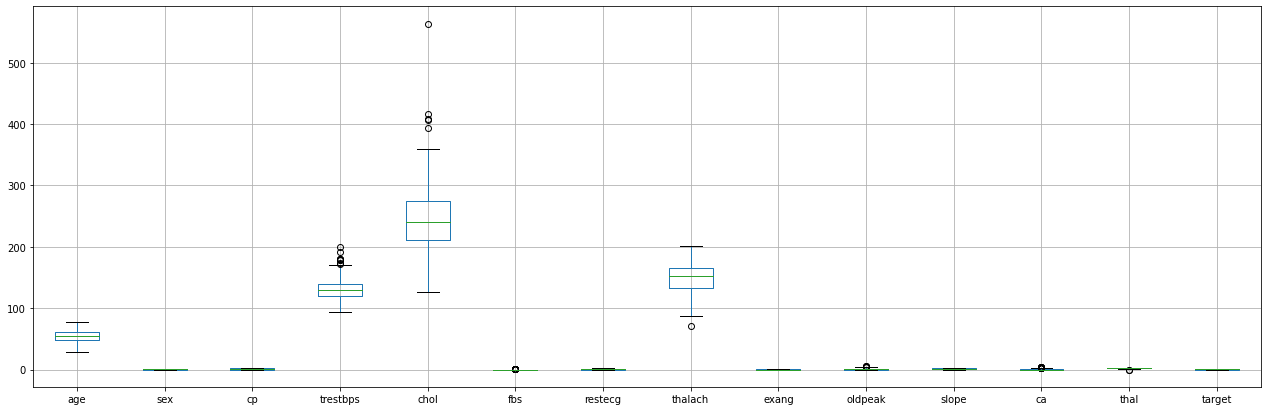

In [19]:
plt.figure(figsize = (22,7))
col = list(df.columns)
df.boxplot(col)

In [20]:
#Detecting and removing the outliers on a single column
'''
#Detecting the outliers and return them to na values on 'thal'
for x in ['thal']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan'''


'''
#Detecting the outliers on 'thal'
#IQR
Q1 = np.percentile(df['thal'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['thal'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Before dropping outliers: ", df.shape)
 
# Upper bound
upper = np.where(df['thal'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['thal'] <= (Q1-1.5*IQR))
 
#Removing the Outliers on 'thal'
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("Before dropping outliers: ", df.shape)'''

'\n#Detecting the outliers on \'thal\'\n#IQR\nQ1 = np.percentile(df[\'thal\'], 25,\n                   interpolation = \'midpoint\')\n \nQ3 = np.percentile(df[\'thal\'], 75,\n                   interpolation = \'midpoint\')\nIQR = Q3 - Q1\n \nprint("Before dropping outliers: ", df.shape)\n \n# Upper bound\nupper = np.where(df[\'thal\'] >= (Q3+1.5*IQR))\n# Lower bound\nlower = np.where(df[\'thal\'] <= (Q1-1.5*IQR))\n \n#Removing the Outliers on \'thal\'\ndf.drop(upper[0], inplace = True)\ndf.drop(lower[0], inplace = True)\n \nprint("Before dropping outliers: ", df.shape)'

In [21]:
#function outliers returns a list of index of outliers
def outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[features] < lower_bound) | (df[features] > upper_bound)]

    return ls

In [22]:
#empty list to store the output indices from mutiple columns
index_list = []
for feature in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']:
  index_list.extend(outliers(df, feature))

#print the list of index of outliers 
index_list

[8,
 101,
 110,
 203,
 223,
 241,
 248,
 260,
 266,
 28,
 85,
 96,
 220,
 246,
 0,
 8,
 14,
 23,
 26,
 28,
 29,
 36,
 60,
 64,
 76,
 78,
 83,
 87,
 90,
 93,
 97,
 99,
 103,
 106,
 111,
 136,
 137,
 169,
 170,
 176,
 197,
 203,
 214,
 215,
 217,
 219,
 222,
 223,
 231,
 251,
 252,
 260,
 269,
 278,
 281,
 282,
 292,
 297,
 300,
 272,
 101,
 204,
 221,
 250,
 291,
 52,
 92,
 97,
 99,
 158,
 163,
 164,
 165,
 181,
 191,
 204,
 208,
 217,
 220,
 231,
 234,
 238,
 247,
 249,
 250,
 251,
 252,
 255,
 267,
 291,
 48,
 281]

In [23]:
#function returns cleaned dataframe without outliers
def remove_outliers(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)

  return df

df_cleaned = remove_outliers(df, index_list)

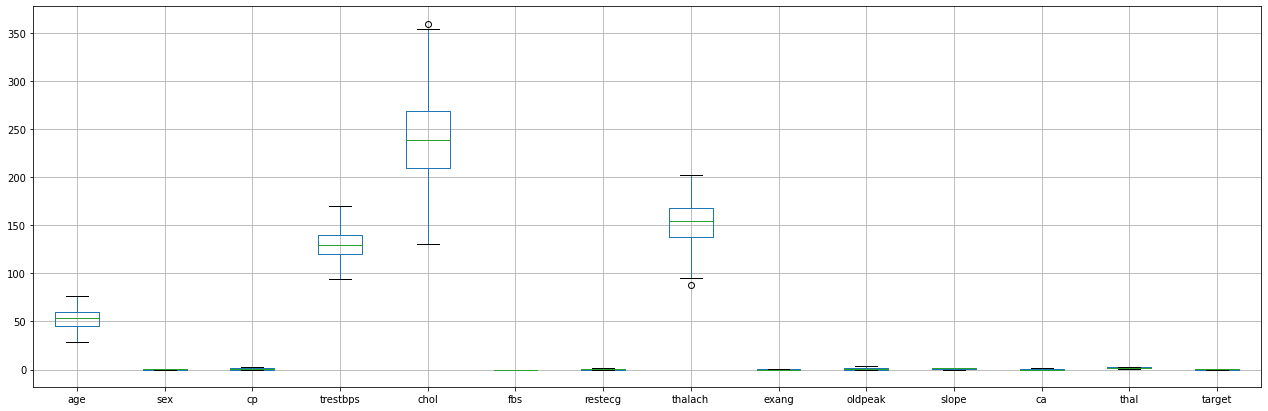

In [24]:
plt.figure(figsize = (22,7))
df_cleaned.boxplot(col)

####Dropping null values
Check if there is any null value to drop it. There is no missing value.

In [25]:
#Checking null values
df_cleaned.info()
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   fbs       228 non-null    int64  
 6   restecg   228 non-null    int64  
 7   thalach   228 non-null    int64  
 8   exang     228 non-null    int64  
 9   oldpeak   228 non-null    float64
 10  slope     228 non-null    int64  
 11  ca        228 non-null    int64  
 12  thal      228 non-null    int64  
 13  target    228 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.7 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##EDA
Expolartory Data Analysis 1 : pre-process to visulize the dataset to apply machine learning algorithm in future.

EDA1 provides the following visual information
1. number of heart disease patients from the dataset
2. number of patients per gender
3. age, trestbps, and chol distributon over the target(heart disease)
4. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



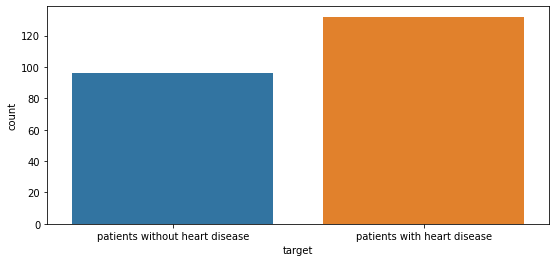

In [26]:
#count heart disease patients: df_cleaned['target'].value_counts()
plt.figure(figsize = (9, 4))
sns.countplot(df_cleaned['target'])
plt.xticks([0,1],['patients without heart disease','patients with heart disease'])
plt.show()

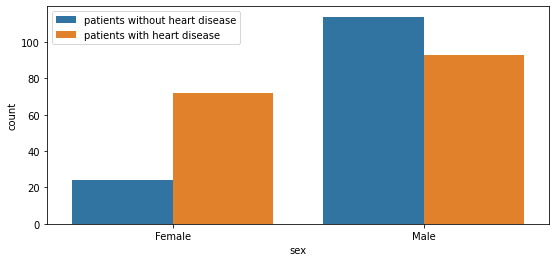

In [106]:
#count heart disease patients per each gender
plt.figure(figsize = (9, 4))
sns.countplot(x ='sex',hue = 'target',data = df)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

Text(0.5, 1.0, 'maximum heart rate acheived distribution')

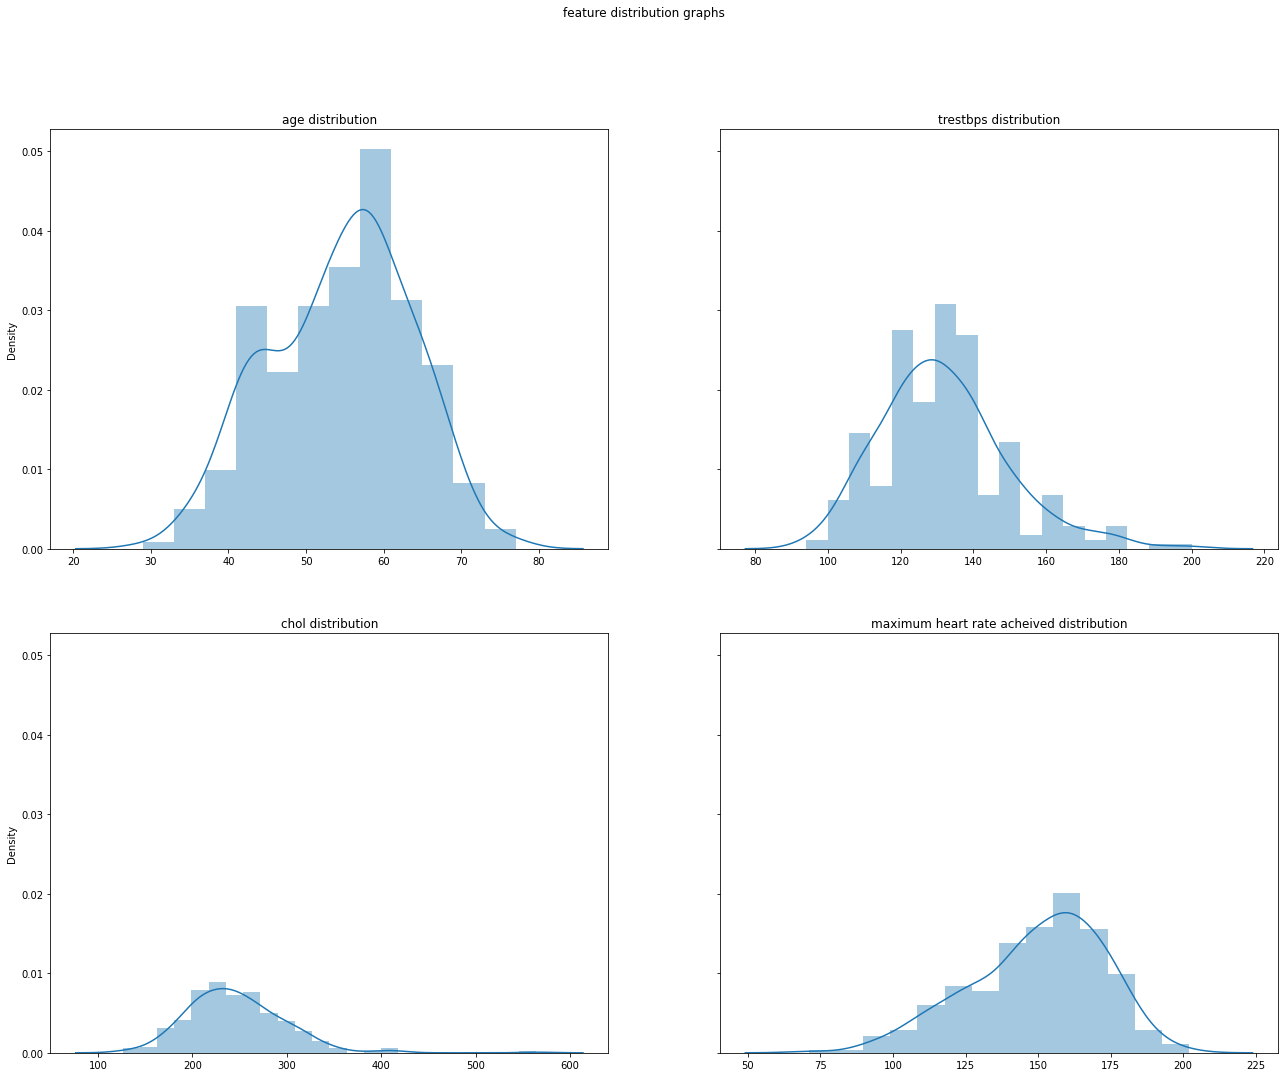

In [109]:
#cite: Geeksforgeeks - 2 x 3 axes grid plot using subplots

figure, axes = plt.subplots(2, 2, figsize = (22,17), sharey=True)
figure.suptitle('feature distribution graphs')

#age disgribution
sns.distplot(ax=axes[0,0], x = df['age'])
axes[0,0].set_title('age distribution')

#trestbps distribution
sns.distplot(ax=axes[0,1], x = df['trestbps'])
axes[0,1].set_title('trestbps distribution')

#chol distribution
sns.distplot(ax=axes[1,0], x = df['chol'])
axes[1,0].set_title('chol distribution')

#thalach distribution
sns.distplot(ax=axes[1,1], x = df['thalach'])
axes[1,1].set_title('maximum heart rate acheived distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'chain past distribution')

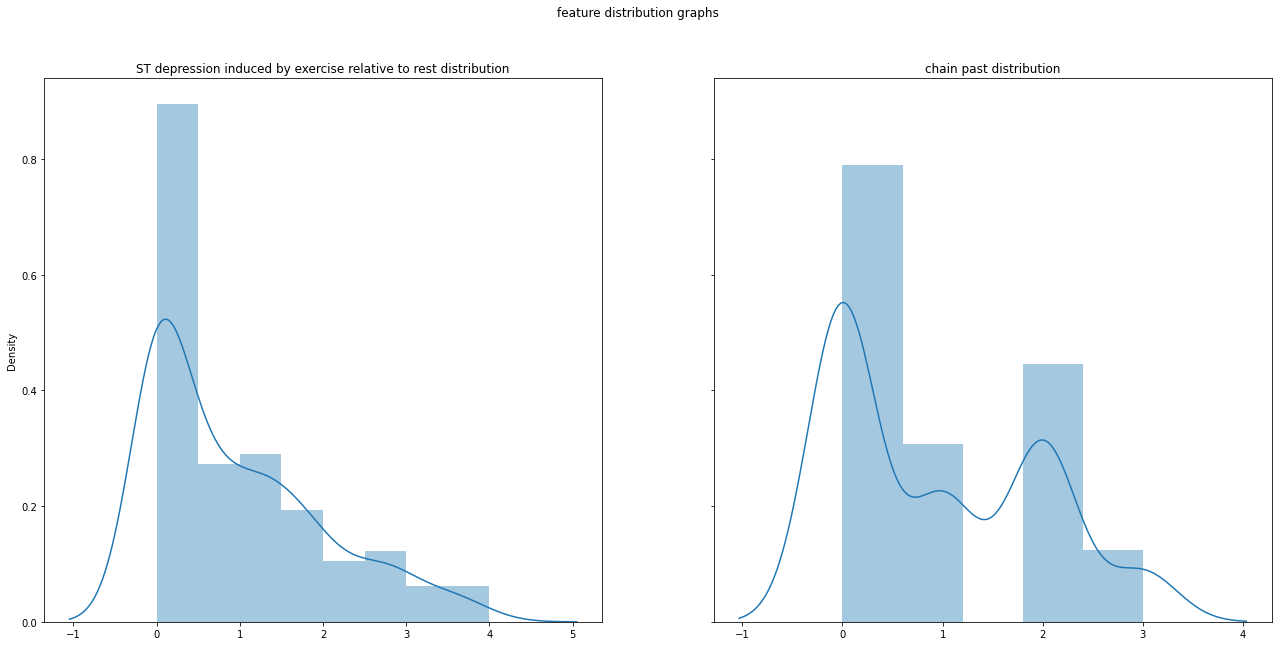

In [69]:
figure, axes = plt.subplots(1, 2, figsize = (22,10), sharey=True)
figure.suptitle('feature distribution graphs')

#oldpeak distribution
sns.distplot(ax=axes[0],x = df_cleaned['oldpeak'])
axes[0].set_title('ST depression induced by exercise relative to rest distribution')

#cp disgribution
sns.distplot(ax=axes[1], x = df_cleaned['cp'])
axes[1].set_title('chain past distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

Text(0.5, 1.0, 'thal distribution')

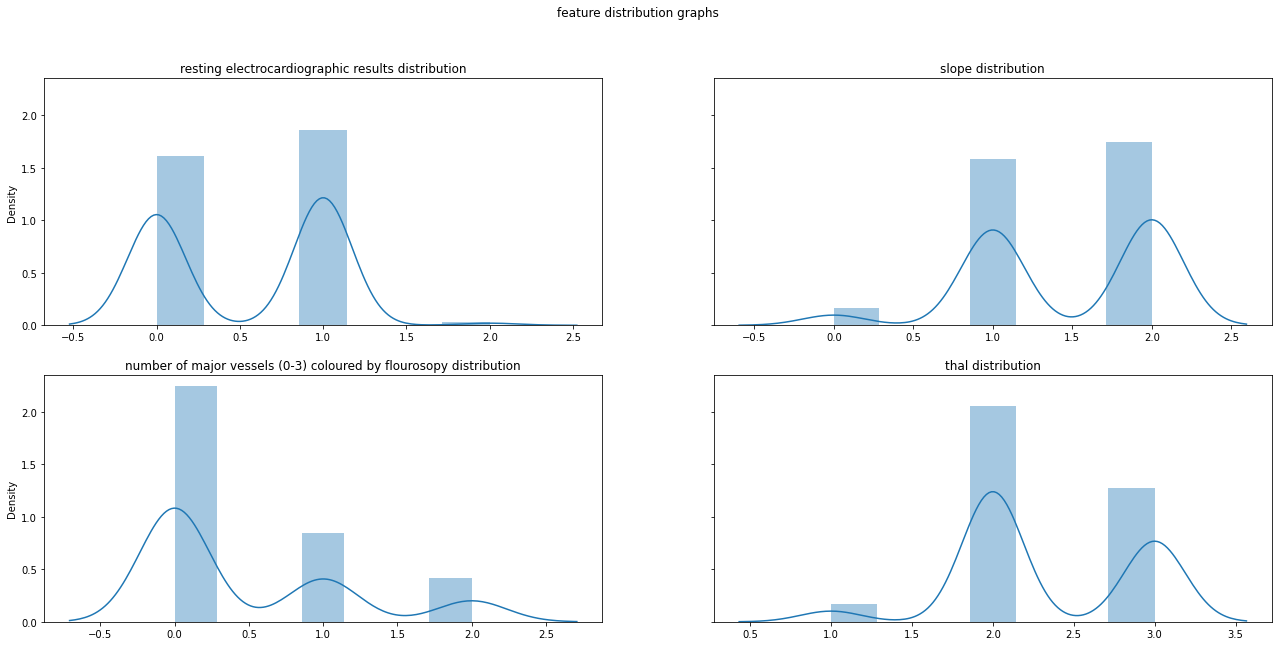

In [70]:
#Geeksforgeeks - 2 x 3 axes grid plot using subplots
figure, axes = plt.subplots(2,2 , figsize = (22,10), sharey=True)
figure.suptitle('feature distribution graphs')

#restecg distribution
sns.distplot(ax=axes[0,0], x = df_cleaned['restecg'])
axes[0,0].set_title('resting electrocardiographic results distribution')

#slope distribution
sns.distplot(ax=axes[0,1], x = df_cleaned['slope'])
axes[0,1].set_title('slope distribution')

#ca distribution
sns.distplot(ax=axes[1,0], x = df_cleaned['ca'])
axes[1,0].set_title('number of major vessels (0-3) coloured by flourosopy distribution')

#thal distribution
sns.distplot(ax=axes[1,1], x = df_cleaned['thal'])
axes[1,1].set_title('thal distribution')

Text(0.5, 1.0, 'exercise induced angina')

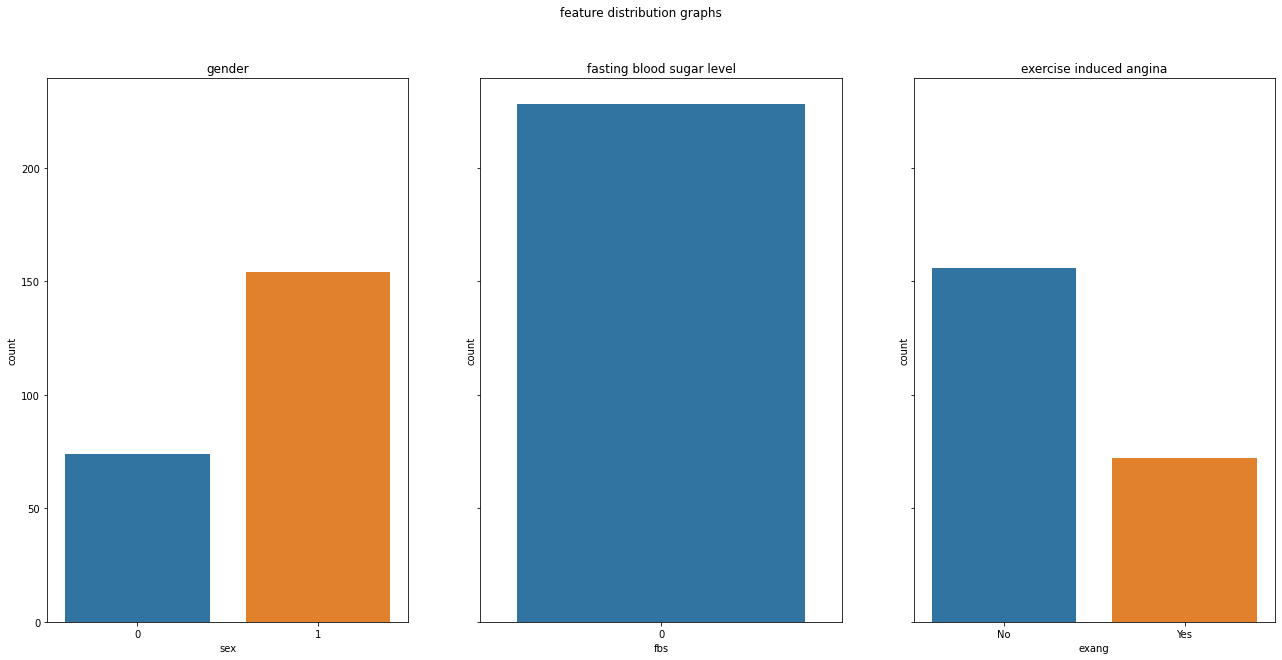

In [94]:
figure, axes = plt.subplots(1,3, figsize = (22,10), sharey=True)
figure.suptitle('feature distribution graphs')

sns.countplot(ax=axes[0], x = df_cleaned['sex'])
plt.xticks([0,1],['Female','Male']) #axes[0].set_xticks(('Female','Male'))
axes[0].set_title('gender')

sns.countplot(ax=axes[1], x = df_cleaned['fbs'])
plt.xticks([0,1],['less than or equal to 120','greater than 120'])
axes[1].set_title('fasting blood sugar level')

sns.countplot(ax=axes[2], x = df_cleaned['exang'])
plt.xticks([0,1],['No','Yes'])
axes[2].set_title('exercise induced angina')

Find the relation between the target and other features

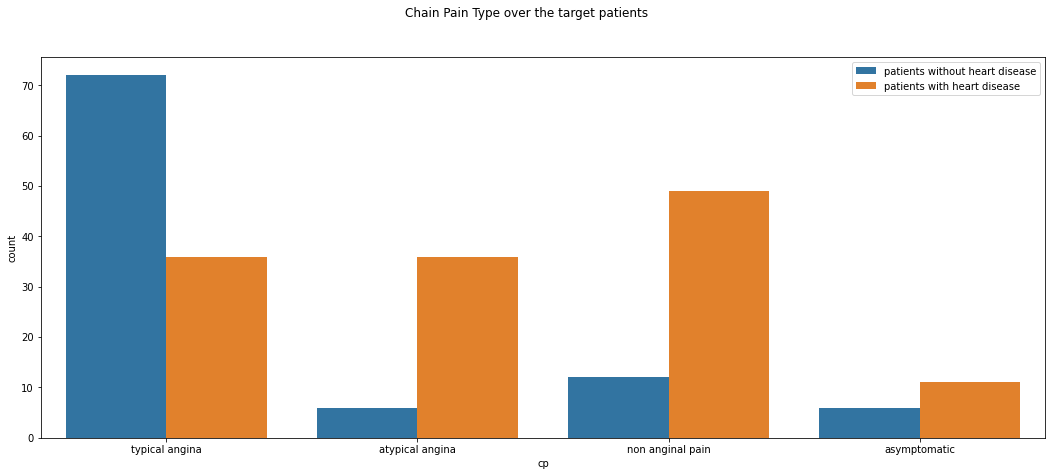

In [98]:
#find the relation between cp and target
plt.figure(figsize = (18,7))
plt.suptitle('Chain Pain Type over the target patients')
sns.countplot(data = df_cleaned, x ='cp', hue = 'target')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non anginal pain','asymptomatic'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

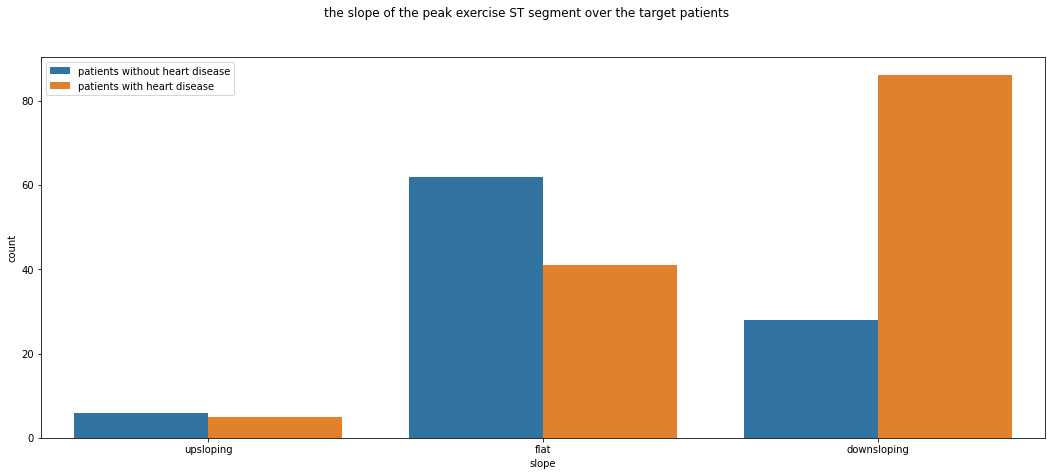

In [97]:
#find the relation between trestbps and target
plt.figure(figsize = (18,7))
plt.suptitle('the slope of the peak exercise ST segment over the target patients')
sns.countplot(x = df_cleaned['slope'], hue = df_cleaned['target'])
plt.xticks([0,1,2],['upsloping','flat','downsloping'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

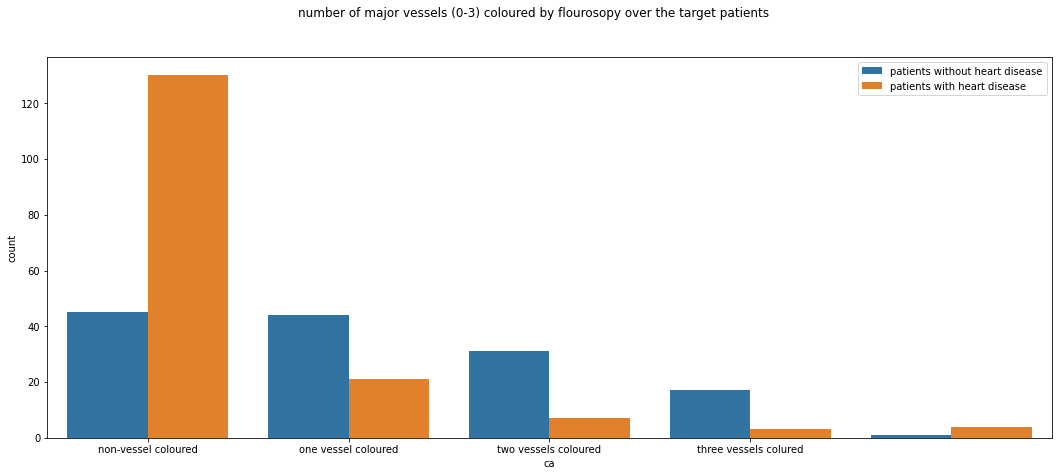

In [113]:
#find the relation between trestbps and target
plt.figure(figsize = (18,7))
plt.suptitle('number of major vessels (0-3) coloured by flourosopy over the target patients')
sns.countplot(data = df, x = 'ca', hue = 'target')
plt.xticks([0,1,2,3],['non-vessel coloured','one vessel coloured','two vessels coloured', 'three vessels colured', 'four vessels colured'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

##EDA 2
Exploratory Data Analysis 2 : pre-process to find the relation between target and other features.

FacetGrid is used to find relation between two subsets within a dataset

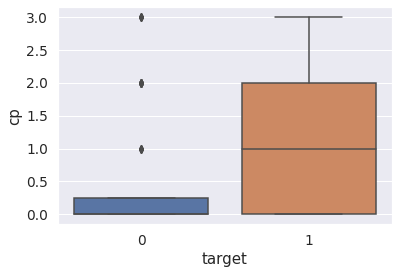

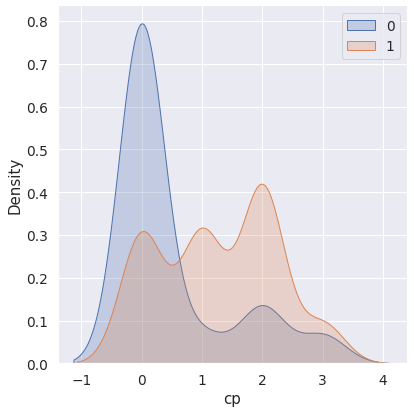

In [ ]:
#compare cp as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'cp'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'cp', shade = True)
plt.legend()
plt.show()

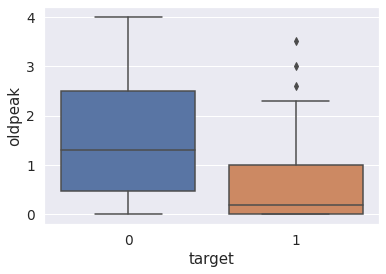

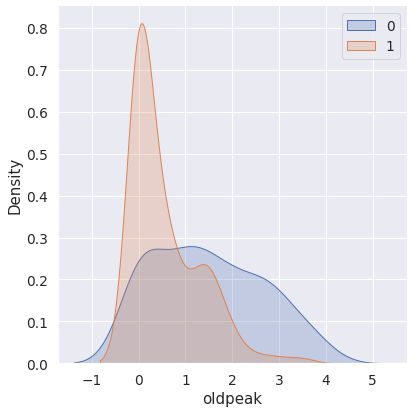

In [ ]:
#compare oldpeak as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'oldpeak'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'oldpeak', shade = True)
plt.legend()
plt.show()

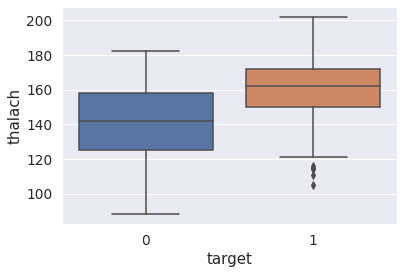

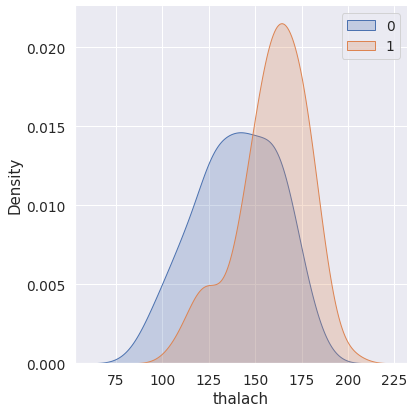

In [ ]:
#compare thalach as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'thalach'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'thalach', shade = True)
plt.legend()
plt.show()

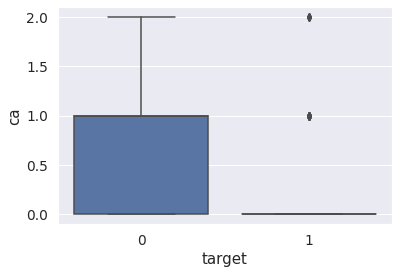

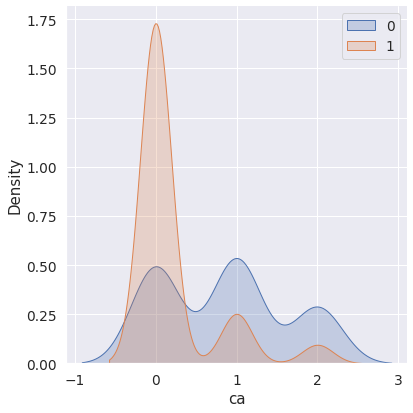

In [ ]:
#compare ca as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'ca'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'ca', shade = True)
plt.legend()
plt.show()

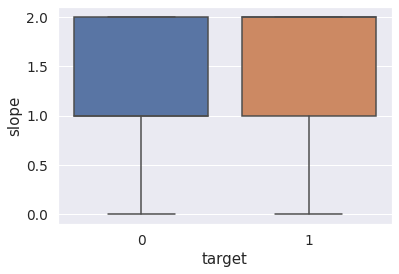

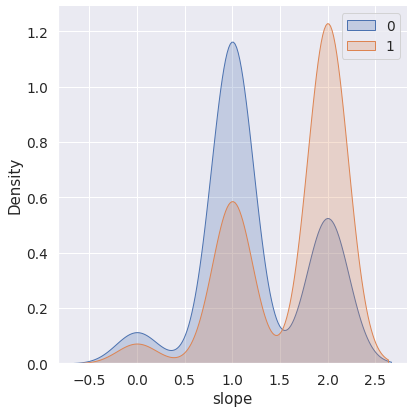

In [ ]:
#compare slope as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'slope'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'slope', shade = True)
plt.legend()
plt.show()

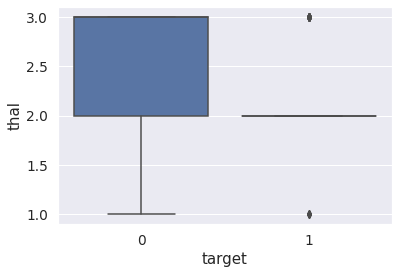

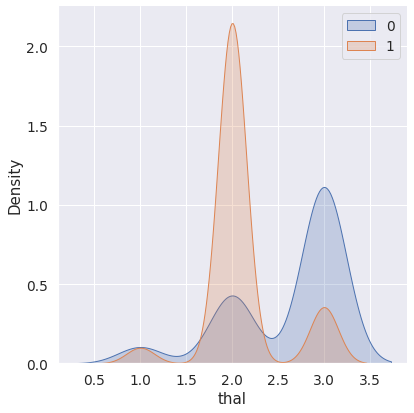

In [ ]:
#compare thal as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'thal'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'thal', shade = True)
plt.legend()
plt.show()

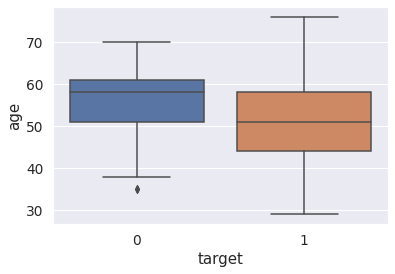

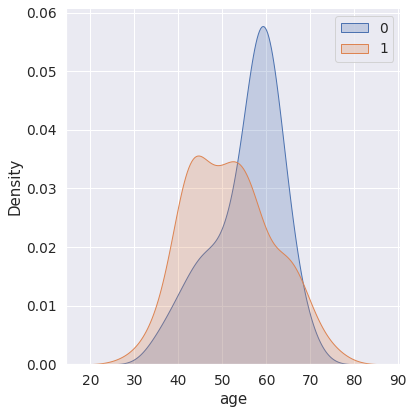

In [ ]:
#compare age as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'age'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'age', shade = True)
plt.legend()
plt.show()

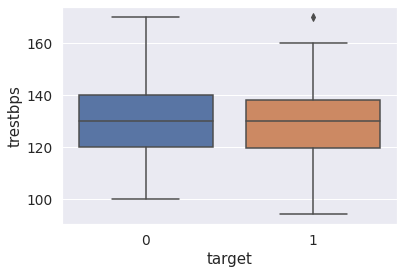

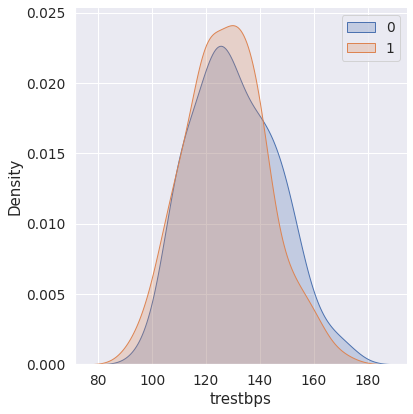

In [ ]:
#compare trestbps as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'trestbps'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'trestbps', shade = True)
plt.legend()
plt.show()

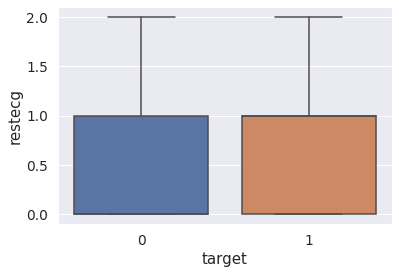

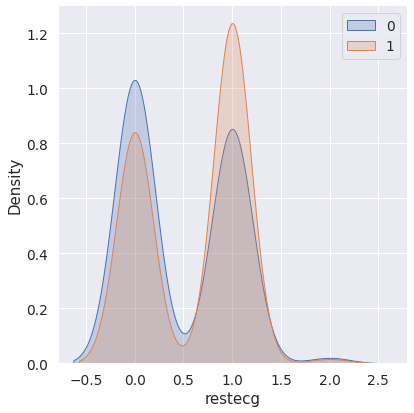

In [ ]:
#compare restecg as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'restecg'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'restecg', shade = True)
plt.legend()
plt.show()

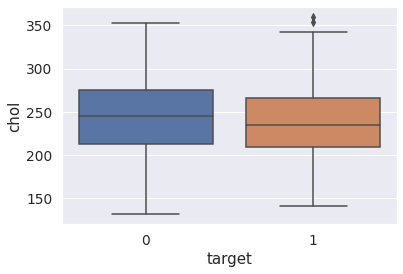

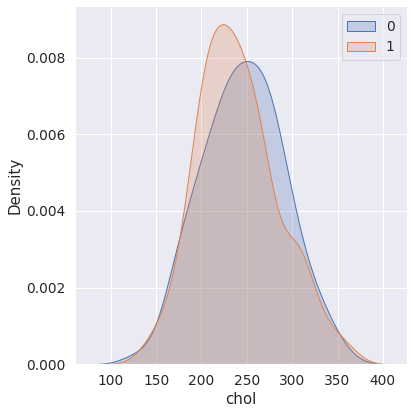

In [ ]:
#compare chol as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'chol'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'chol', shade = True)
plt.legend()
plt.show()

##Visulazing Statistics / Heatmap
Find the correlation between the target feature(heart disease) and other features.

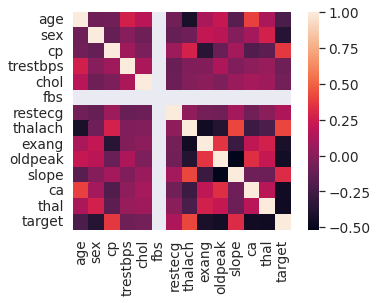

In [307]:
#Heatmap visulisation for each attribute coefficient correlation
correlation=df_cleaned.corr()
sns.heatmap(correlation, square=True)

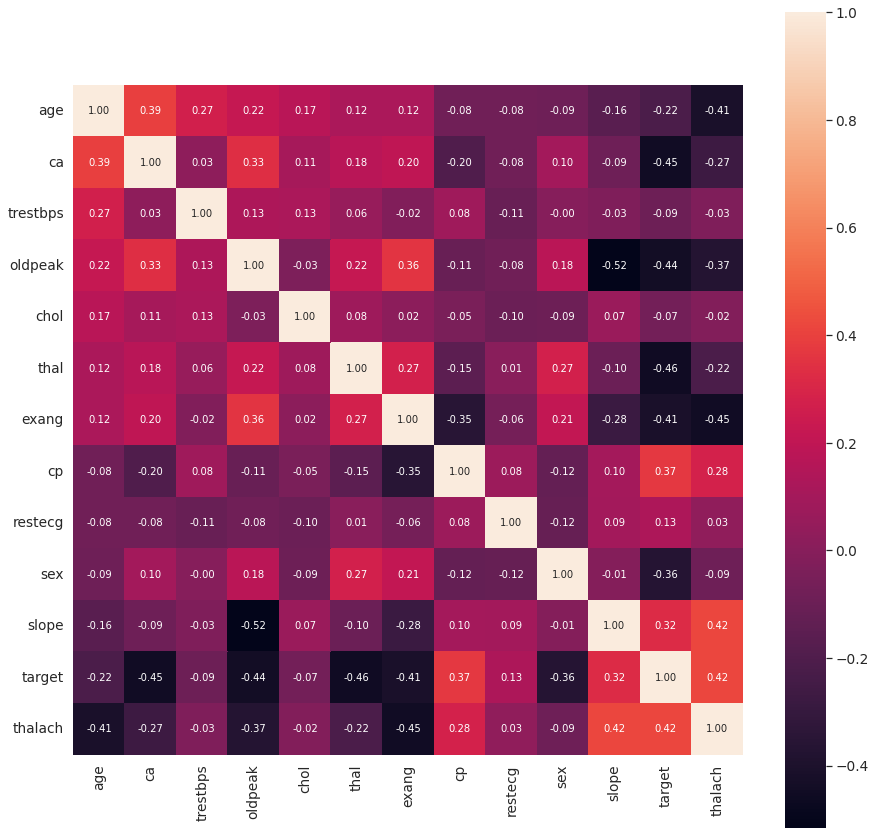

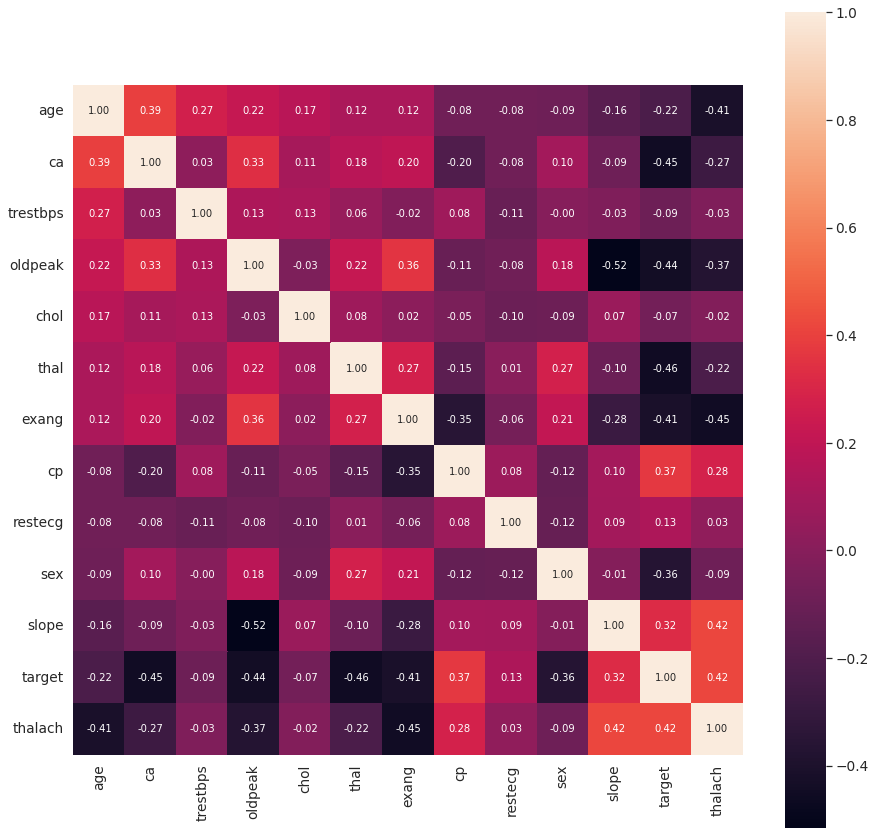

In [312]:
#number of features that are viewed in heat map
plt.figure(figsize = (15, 15))
#every columns are drawn in heat map
k=14

#find the columns which related to output attribute
#arrange from top coefficient correlation value to downwards
cols=correlation.nlargest(k,'age')['age'].index

#correlation coefficient values
coff_values=np.corrcoef(df_cleaned[cols].values.T)

#describe the heatmap of correlation coefficient values
sns.set(font_scale=1.25)
sns.heatmap(coff_values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)

plt.gcf() 

In [313]:
#correlation coefficient values in each attributes
correlation_values=df_cleaned.corr()['target']
correlation_values.abs().sort_values(ascending=False)

target      1.000000
thal        0.455780
ca          0.447167
oldpeak     0.439194
thalach     0.417870
exang       0.414407
cp          0.371115
sex         0.363483
slope       0.323569
age         0.215120
restecg     0.131641
trestbps    0.092560
chol        0.067321
fbs              NaN
Name: target, dtype: float64